# The demonstration of the tropical precipitation module in detailes

# Structure


1. [Load of packages, modules and data](#1-load-of-packages-modules-and-data)

2. [Initialization of precipitation diagnostic and setting the class attributes](#2-initializing-the-class-object-and-setting-the-class-attributes)

3. [Illustration of some preprocessing possibilities of precipitation diagnostic, such as](#3-illustation-of-some-preprocessing-possibilietes-of-precipitation-diagnostic)

    3.1. [Selection of tropical latitudes](#32-selection-of-tropical-latitudes)

    3.2. [Automatic preprocessing of data](#32-automatic-preprocessing-of-data)

4. [Calculation of histogram of precipitation/tropical precipitation](#4-calculation-of-histogram-of-precipitationtropicalprecipitation)

    4.1. [with manual data preprocessing](#41-diagnostic-with-manual-data-preprocessing)

    4.2 [automatic data preprocessing](#42-diagnostic-with-automatic-data-preprocessing)

    4.3. [with non uniform binning](#43-histogram-with-not-uniform-binning)

    4.4. [Convertation of counts into frequency and PDF](#44-convertation-of-counts-into-frequency-and-pdf) 
    
5. [Calculation time expectation for a total dataset](#5-expected-calculation-time-for-entire-dataset)

6. [Dataset creator and load to the memory](#6-dataset-creator-and-load-to-the-memory)

7. [Plots](#7-plots)

[Go to the end of file](#the-end)

#

## 1. Load of  packages, modules and data

In [1]:
import sys

from aqua import Reader, catalogue
from aqua.benchmark import functions_for_xarrays,  graphic_creator, time_functions
sys.path.insert(0, '../')
from src.trop_prec_diagnostic import TR_PR_Diagnostic as TR_PR_Diag

#### IFS data

In [2]:
reader = Reader(model="IFS", exp="tco2559-ng5", source="ICMGG_atm2d", regrid="r010")
ifs = reader.retrieve(regrid=True)

In [7]:
ifs

<xarray.Dataset>
Dimensions:    (time: 8329, lat: 1800, lon: 3600, level: 5)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-20 ... 2021-01-01
  * lat        (lat) float64 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon        (lon) float64 0.0 0.1 0.2 0.3 0.4 ... 359.6 359.7 359.8 359.9
  * level      (level) int64 1 2 3 4 5
Data variables: (12/81)
    100si      (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    100u       (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    100v       (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    10u        (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    10v        (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    2d         (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    ...         ...
    uvb        (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    vike       (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    vipie      (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    vipile     (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    vithe      (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    z          (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
Attributes:
    edition:            1
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          0
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

#### Regriding the small part/chunk of dataset for tests

In [9]:
ifs_chunk = ifs["tprate"][10:30,:]
ifs_chunk

<xarray.DataArray 'tprate' (time: 20, lat: 1800, lon: 3600)>
dask.array<getitem, shape=(20, 1800, 3600), dtype=float64, chunksize=(1, 1800, 3600), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20T10:00:00 ... 2020-01-21T05:00:00
  * lat      (lat) float64 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float64 0.0 0.1 0.2 0.3 0.4 ... 359.5 359.6 359.7 359.8 359.9
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

## 2. Initializing the class object and setting the class attributes

In [ ]:
help(TR_PR_Diag)

In [4]:
diag = TR_PR_Diag()

diag.trop_lat = 10

diag.num_of_bins    = 15
diag.first_edge     = 0
diag.width_of_bin   = 1*10**(-4)/diag.num_of_bins
diag.bins           = None


#### User can put specify all attributes during initialization of class object 

In [5]:
diag = TR_PR_Diag(num_of_bins = 15, first_edge = 0, width_of_bin = 1*10**(-6)/15)

## 3. Illustration of some preprocessing possibilities of precipitation diagnostic

#### Units of precepitation rate

In [18]:
ifs_chunk.attrs['units']

'm s**-1'

### 3.1 Selection of tropical latitudes

In [10]:
ifs_chunk_trop = diag.ds_per_lat_range(ifs_chunk)

In [12]:
ifs_chunk_trop

<xarray.DataArray 'tprate' (time: 20, lat: 200, lon: 3600)>
dask.array<where, shape=(20, 200, 3600), dtype=float64, chunksize=(1, 200, 3600), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20T10:00:00 ... 2020-01-21T05:00:00
  * lat      (lat) float64 -9.95 -9.85 -9.75 -9.65 -9.55 ... 9.65 9.75 9.85 9.95
  * lon      (lon) float64 0.0 0.1 0.2 0.3 0.4 ... 359.5 359.6 359.7 359.8 359.9
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

#### We can modify the selected tropical area as 

In [21]:
diag.trop_lat = 25

ifs_chunk_trop = diag.ds_per_lat_range(ifs_chunk)

#### OR 

In [91]:
ifs_chunk_trop = diag.ds_per_lat_range(ifs_chunk, trop_lat = 10)

In [22]:
ifs_chunk_trop

<xarray.DataArray 'tprate' (time: 20, lat: 500, lon: 3600)>
dask.array<where, shape=(20, 500, 3600), dtype=float64, chunksize=(1, 500, 3600), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20T10:00:00 ... 2020-01-21T05:00:00
  * lat      (lat) float64 -24.95 -24.85 -24.75 -24.65 ... 24.75 24.85 24.95
  * lon      (lon) float64 0.0 0.1 0.2 0.3 0.4 ... 359.5 359.6 359.7 359.8 359.9
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

### 3.2. Automatic preprocessing of data

#### Preprocessing can includes

 - selection of latitude range
 - selection of time range

In [6]:
diag = TR_PR_Diag(trop_lat = 10, s_time = 10,  f_time = 25, num_of_bins = 15, first_edge = 0, width_of_bin = 1*10**(-6)/15)

data = diag.preprocessing(ifs)

In [ ]:
diag = TR_PR_Diag(trop_lat = 10, s_month=3,  f_month=4, num_of_bins = 15, first_edge = 0, width_of_bin = 1*10**(-6)/15)

data = diag.preprocessing(ifs)

In [ ]:
data = diag.preprocessing(ifs,  s_time = '2020:01', f_time ='2020/03/20/12')

In [ ]:
data = diag.preprocessing(ifs, trop_lat = 10,  s_time = '2020', f_time ='2020.03.20')

## 4. Calculation of histogram of precipitation/tropicalprecipitation


### 4.1. Diagnostic with manual data preprocessing

### Fastest histogram

In [7]:
hist_ifs  = diag.hist1d_fast(ifs, s_time = 20, f_time = 30)
hist_ifs

<xarray.DataArray (left_edge: 15)>
array([6.773495e+06, 1.040800e+05, 5.275700e+04, 3.551500e+04,
       2.599600e+04, 2.061800e+04, 1.656500e+04, 1.413400e+04,
       1.213200e+04, 1.055400e+04, 9.255000e+03, 8.336000e+03,
       7.336000e+03, 6.682000e+03, 6.221000e+03])
Coordinates:
  * left_edge  (left_edge) float64 0.0 6.667e-08 ... 8.667e-07 9.333e-07
    width      (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08 6.667e-08
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

In [7]:
diag = TR_PR_Diag(trop_lat = 10, s_time = 10,  f_time = 25, num_of_bins = 15, first_edge = 0, width_of_bin = 1*10**(-6)/15)

hist_ifs  = diag.hist1d_fast(ifs)
hist_ifs

<xarray.DataArray (bin: 15)>
array([10024387.,   182325.,    91300.,    60496.,    44693.,    34808.,
          28400.,    23838.,    20361.,    17703.,    15588.,    13865.,
          12551.,    11098.,    10211.])
Coordinates:
  * bin      (bin) float64 0.0 6.667e-08 1.333e-07 ... 8e-07 8.667e-07 9.333e-07
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

In [11]:
hist_ifs_trop  = diag.hist1d_fast(ifs_chunk_trop,  preprocess = False)
hist_ifs_trop

<xarray.DataArray (left_edge: 15)>
array([1.3432997e+07, 2.3170900e+05, 1.1512100e+05, 7.6323000e+04,
       5.6298000e+04, 4.3959000e+04, 3.5616000e+04, 3.0077000e+04,
       2.5641000e+04, 2.2335000e+04, 1.9644000e+04, 1.7486000e+04,
       1.5643000e+04, 1.4076000e+04, 1.2983000e+04])
Coordinates:
  * left_edge  (left_edge) float64 0.0 6.667e-08 ... 8.667e-07 9.333e-07
    width      (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08 6.667e-08
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

#### We can use `bins` attribute instead of  `num_of_bins`,    `first_edge`,    `width_of_bin`

In [15]:
diag.num_of_bins, diag.first_edge, diag.width_of_bin = None, None, None
n=15
bins = [i*1*10**(-6)/n for i in range(0, n)]

In [16]:
hist_ifs_trop  = diag.hist1d_fast(ifs_chunk_trop,  preprocess = False, bins=bins)
hist_ifs_trop

<xarray.DataArray (bin: 15)>
array([1.3404965e+07, 2.3917300e+05, 1.1689400e+05, 7.7315000e+04,
       5.6905000e+04, 4.4768000e+04, 3.6254000e+04, 3.0433000e+04,
       2.6138000e+04, 2.2681000e+04, 2.0056000e+04, 1.7872000e+04,
       1.5890000e+04, 1.4514000e+04, 1.3067000e+04])
Coordinates:
  * bin      (bin) float64 0.0 6.667e-08 1.333e-07 ... 8e-07 8.667e-07 9.333e-07
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

#### OR

In [ ]:
diag.bins = bins 
hist_ifs_trop  = diag.hist1d_fast(ifs_chunk_trop,  preprocess = False)
hist_ifs_trop

## 4.2. Diagnostic with automatic data preprocessing

In [50]:
diag = TR_PR_Diag()


diag.num_of_bins = 15
diag.first_edge = 0
diag.width_of_bin = 1*10**(-4)/diag.num_of_bins

diag.trop_lat = 10
diag.s_time = 10
diag.f_time = 20

#### OR

In [12]:
diag = TR_PR_Diag(trop_lat = 10, s_time = 10, f_time = 20, num_of_bins = 15, first_edge = 0, width_of_bin = 1*10**(-6)/15)


In [13]:
hist_ifs_prepr  = diag.hist1d_fast(ifs)
hist_ifs_prepr 

<xarray.DataArray (left_edge: 15)>
array([6659502.,  127629.,   62364.,   40808.,   30302.,   23341.,
         19051.,   15943.,   13509.,   11781.,   10389.,    9150.,
          8307.,    7394.,    6762.])
Coordinates:
  * left_edge  (left_edge) float64 0.0 6.667e-08 ... 8.667e-07 9.333e-07
    width      (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08 6.667e-08
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

In [ ]:
hist_ifs_prepr  = diag.hist1d_fast(ifs, trop_lat = 10, s_month=3,  f_month=4)
hist_ifs_prepr 

In [ ]:
diag = TR_PR_Diag(trop_lat = 10, s_time = '2020:01', f_time ='2020/03/20/12', num_of_bins = 15, first_edge = 0, width_of_bin = 1*10**(-6)/15)

hist_ifs_prepr  = diag.hist1d_fast(ifs)
hist_ifs_prepr 

In [ ]:
hist_ifs_prepr  = diag.hist1d_fast(ifs, trop_lat = 10, s_time = '2020', f_time ='2020.03.20')
hist_ifs_prepr 

### 4.3. Histogram with not uniform binning

In [14]:
#bins = numpy.logspace(-9, -6, 15)
bins = [1.00000000e-09, 1.63789371e-09, 2.68269580e-09, 4.39397056e-09,
       7.19685673e-09, 1.17876863e-08, 1.93069773e-08, 3.16227766e-08,
       5.17947468e-08, 8.48342898e-08, 1.38949549e-07, 2.27584593e-07,
       3.72759372e-07, 6.10540230e-07, 1.00000000e-06]

In [15]:
diag = TR_PR_Diag(bins = bins, s_time = 10, f_time = 30)

In [16]:
hist_ifs_trop_logspaced  = diag.hist1d_np(ifs_chunk_trop, preprocess=False, bins=bins)
hist_ifs_trop_logspaced

<xarray.DataArray (left_edge: 14)>
array([826501, 904330, 971338, 994507, 912120, 703004, 461945, 289736,
       197269, 155523, 137858, 125026, 111833,  98421])
Coordinates:
  * left_edge  (left_edge) float64 1e-09 1.638e-09 ... 3.728e-07 6.105e-07
    width      (left_edge) float64 6.379e-10 1.045e-09 ... 2.378e-07 3.895e-07
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

### 4.4. Convertation of counts into frequency and PDF

##### Frequency histogram

In [19]:
diag.convert_counts_to_frequency(hist_ifs_prepr)

<xarray.DataArray (left_edge: 15)>
array([0.94511535, 0.01811309, 0.00885069, 0.00579146, 0.00430045,
       0.00331255, 0.00270371, 0.00226263, 0.00191719, 0.00167196,
       0.00147441, 0.00129857, 0.00117893, 0.00104936, 0.00095966])
Coordinates:
  * left_edge  (left_edge) float64 0.0 6.667e-08 ... 8.667e-07 9.333e-07
    width      (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08 6.667e-08
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

##### PDF histogram

In [21]:
diag.convert_counts_to_pdf(hist_ifs_prepr)

<xarray.DataArray (left_edge: 15)>
array([14176730.20133314,   271696.27681859,   132760.31785499,
          86871.96220618,    64506.81726063,    49688.25891625,
          40555.71829029,    33939.41613049,    28757.92338373,
          25079.36156516,    22116.07565575,    19478.4957407 ,
          17683.91957574,    15740.32759637,    14394.92767198])
Coordinates:
  * left_edge  (left_edge) float64 0.0 6.667e-08 ... 8.667e-07 9.333e-07
    width      (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08 6.667e-08
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

### 4.5 Weighted histograms

##### Weights

In [32]:
reader.grid_area

<xarray.DataArray 'cell_area' (lat: 1800, lon: 3600)>
dask.array<open_dataset-4aeb6b2f3d9786709de8e84b837b8c0fcell_area, shape=(1800, 3600), dtype=float64, chunksize=(1800, 3600), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 0.0 0.1 0.2 0.3 0.4 ... 359.5 359.6 359.7 359.8 359.9
  * lat      (lat) float64 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
    time     datetime64[ns] ...
Attributes:
    standard_name:  area
    long_name:      area of grid cell
    units:          m2

In [35]:
diag = TR_PR_Diag( trop_lat=10,  num_of_bins = 20, first_edge = 0, width_of_bin = 1*10**(-6)/15, s_time=10, f_time=11)

In [36]:
hist_ifs_trop_weighted_np  = diag.hist1d_np(ifs, weights=reader.grid_area)
hist_ifs_trop_weighted_np

<xarray.DataArray (left_edge: 20)>
array([8.25643788e+13, 1.60828485e+12, 8.06992514e+11, 5.12403666e+11,
       3.71242019e+11, 2.89873338e+11, 2.25050589e+11, 1.94161629e+11,
       1.58977322e+11, 1.41424812e+11, 1.25073390e+11, 1.02949126e+11,
       9.63070419e+10, 8.78225386e+10, 8.17935548e+10, 7.70049972e+10,
       7.18555064e+10, 5.60820218e+10, 5.78097681e+10, 4.79813371e+10])
Coordinates:
  * left_edge  (left_edge) float64 0.0 6.667e-08 1.333e-07 ... 1.2e-06 1.267e-06
    width      (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08 6.667e-08
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

In [38]:
hist_ifs_trop_weighted  = diag.hist1d_pyplot(ifs, weights=reader.grid_area)
hist_ifs_trop_weighted

<xarray.DataArray (left_edge: 20)>
array([8.25643788e+13, 1.60828485e+12, 8.06992514e+11, 5.12403666e+11,
       3.71242019e+11, 2.89873338e+11, 2.25050589e+11, 1.94161629e+11,
       1.58977322e+11, 1.41424812e+11, 1.25073390e+11, 1.02949126e+11,
       9.63070419e+10, 8.78225386e+10, 8.17935548e+10, 7.70049972e+10,
       7.18555064e+10, 5.60820218e+10, 5.78097681e+10, 4.79813371e+10])
Coordinates:
  * left_edge  (left_edge) float64 0.0 6.667e-08 1.333e-07 ... 1.2e-06 1.267e-06
    width      (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08 6.667e-08
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

## 5. Expected calculation time for entire dataset

####  Checking the calculation time of a small chunk of the dataset

In [22]:
result = %timeit -r 2 -n 1 -o  diag.hist1d_fast(ifs_chunk_trop,  preprocess = False)
time_fast_reg, time_fast_reg_stdev =  result.average, result.stdev 

9.43 s ± 802 ms per loop (mean ± std. dev. of 2 runs, 1 loop each)


#### Estemated calculation time of entire dataset

In [23]:
from aqua.benchmark.time_functions import estimated_total_calc_time as estimated_total_calc_time
from aqua.benchmark.time_functions import optimal_amount_of_timesteps as optimal_amount_of_timesteps

In [24]:
estimated_total_calc_time(ds_part = ifs_chunk_trop, calc_time = time_fast_reg, ds_full = ifs,  units='D')

(3928.526136917909, 0.04546905251062394)

#### Optimal amount of timesteps

In [25]:
optimal_amount_of_timesteps(ds_part = ifs_chunk_trop, calc_time = time_fast_reg,  ds_full = ifs, wanted_time ='3H')

(2.7491226031330536, 22897)

## 6. Dataset creator and load to the memory

##### Creating the Dataset with global attributes

In [41]:
import xarray as xr

tprate_dataset = hist_ifs_prepr.to_dataset(name="trop_counts")
tprate_dataset['weighted_counts']=hist_ifs_trop_weighted_np
tprate_dataset.attrs = ifs.attrs

##### Adding the Frequency DataArray to Dataset

In [43]:
hist_ifs_frequency = diag.convert_counts_to_frequency( hist_ifs_prepr)
tprate_dataset['trop_frequency'] = hist_ifs_frequency

##### Adding the PDF DataArray to Dataset

In [44]:
hist_ifs_pdf = diag.convert_counts_to_pdf( hist_ifs_prepr)
tprate_dataset['trop_pdf'] = hist_ifs_pdf

In [45]:
tprate_dataset

<xarray.Dataset>
Dimensions:          (left_edge: 15)
Coordinates:
  * left_edge        (left_edge) float64 0.0 6.667e-08 ... 8.667e-07 9.333e-07
    width            (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08
Data variables:
    trop_counts      (left_edge) float64 6.66e+06 1.276e+05 ... 6.762e+03
    weighted_counts  (left_edge) float64 8.256e+13 1.608e+12 ... 8.179e+10
    trop_frequency   (left_edge) float64 0.9451 0.01811 ... 0.001049 0.0009597
    trop_pdf         (left_edge) float64 1.418e+07 2.717e+05 ... 1.439e+04
Attributes:
    edition:            1
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          0
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

##### Loading to the memory

In [46]:
import pickle

with open('ifs_dataset.pickle', 'wb') as output:
    pickle.dump(tprate_dataset, output)

##### Reading from the memory

In [47]:
import pickle
with open('ifs_dataset.pickle', 'rb') as data:
    dataset = pickle.load(data)
dataset 

<xarray.Dataset>
Dimensions:          (left_edge: 15)
Coordinates:
  * left_edge        (left_edge) float64 0.0 6.667e-08 ... 8.667e-07 9.333e-07
    width            (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08
Data variables:
    trop_counts      (left_edge) float64 6.66e+06 1.276e+05 ... 6.762e+03
    weighted_counts  (left_edge) float64 8.256e+13 1.608e+12 ... 8.179e+10
    trop_frequency   (left_edge) float64 0.9451 0.01811 ... 0.001049 0.0009597
    trop_pdf         (left_edge) float64 1.418e+07 2.717e+05 ... 1.439e+04
Attributes:
    edition:            1
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          0
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

#

## 7. Plots

#### Plot of obtained histogram 

##### Histogram of counts (`frequency=False, pdf = False`) + smooth linestyle (`smooth = True`)

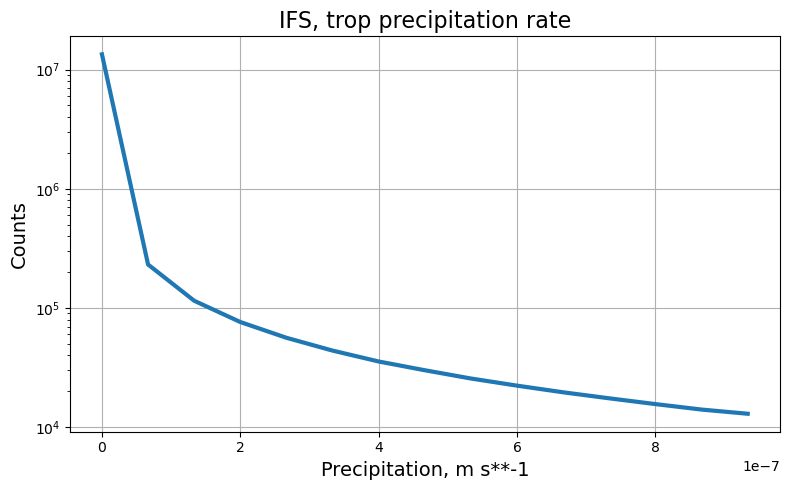

In [27]:
diag.hist_plot(hist_ifs_trop, frequency=False, pdf = False, smooth = True, step = False, viridis = False,
               xlogscale = False, label='IFS/IFS_trop', plot_title = "IFS, trop precipitation rate")

##### Histogram of frequency (`frequency=True`) + step linestyle (`step = True`)

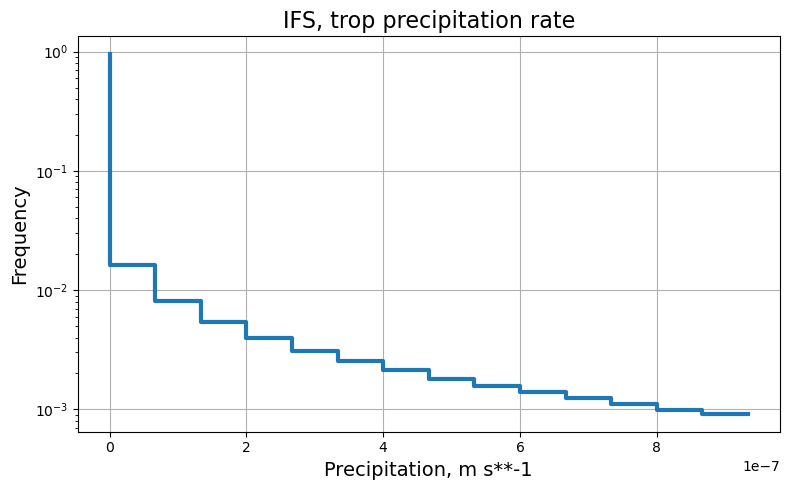

In [28]:
diag.hist_plot(hist_ifs_trop,  frequency=True, pdf = False, smooth = False, step = True, viridis = False,
               xlogscale = False, label='IFS/IFS_trop', plot_title = "IFS, trop precipitation rate")

##### Histogram of PDF  (`pdf=True`) + viridis style (`smooth = False, step = False`)

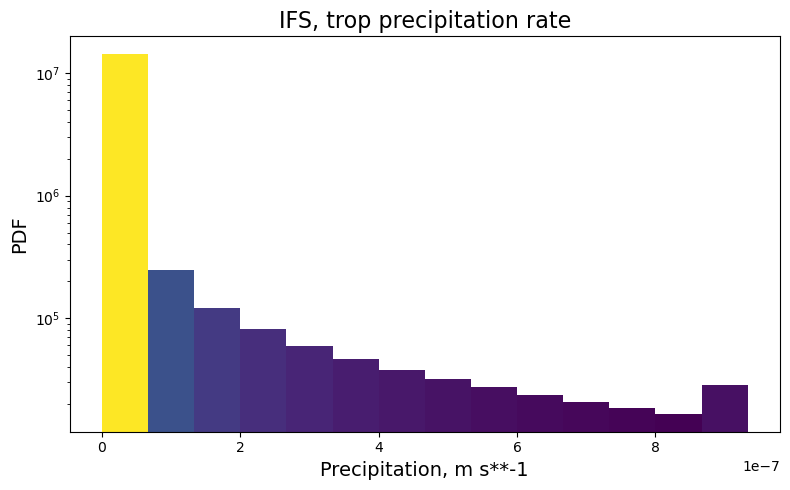

In [29]:
diag.hist_plot(hist_ifs_trop,  frequency=False, pdf = True, smooth = False, step = False, viridis = True,
               xlogscale = False, label='IFS/IFS_trop', plot_title = "IFS, trop precipitation rate")

##### Default arguments of plot function

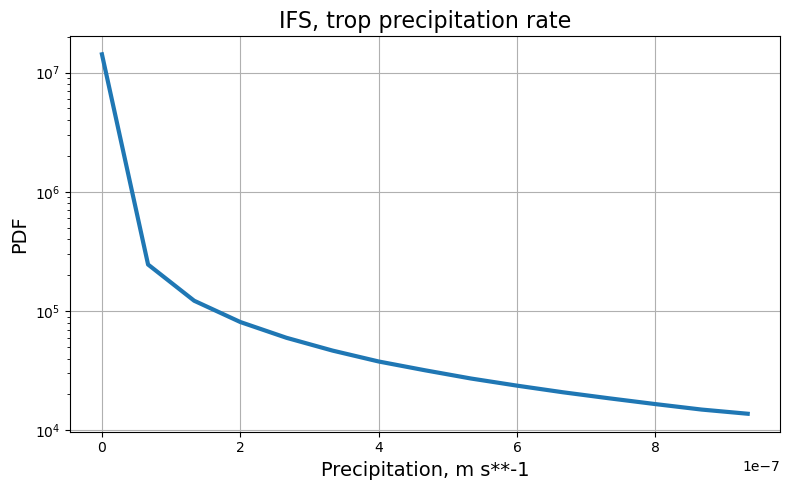

In [30]:
diag.hist_plot(hist_ifs_trop, weights=None, frequency = False, pdf = True, smooth = True, step = False, viridis = False, 
               ls = '-', xlogscale = False, color = 'tab:blue', save = True, 
                label='IFS/IFS_trop', plot_title = "IFS, trop precipitation rate")

### Histogram of logspaced binning. Argument `xlogscale=True` setting x-axe to the log scale. By default `xlogscale=False` 

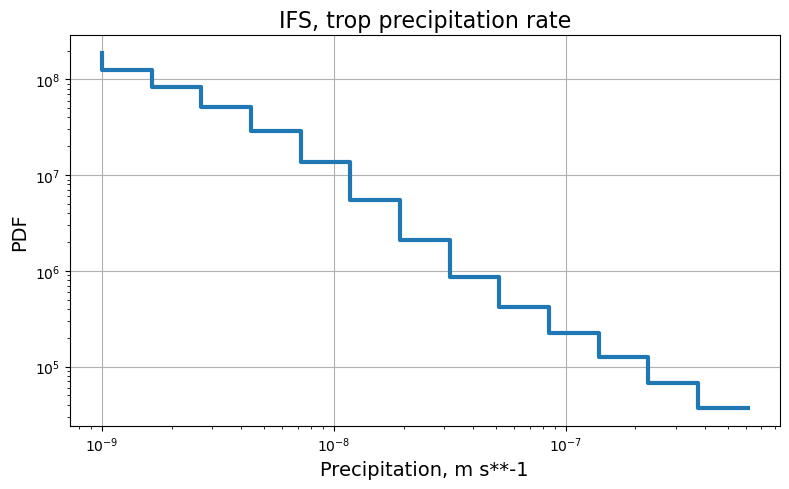

In [31]:
diag.hist_plot(hist_ifs_trop_logspaced, frequency = False, pdf = True, step=True, smooth = False, xlogscale=True, \
                label='IFS/IFS_trop', plot_title = "IFS, trop precipitation rate")

##### Weighted values of precipitation

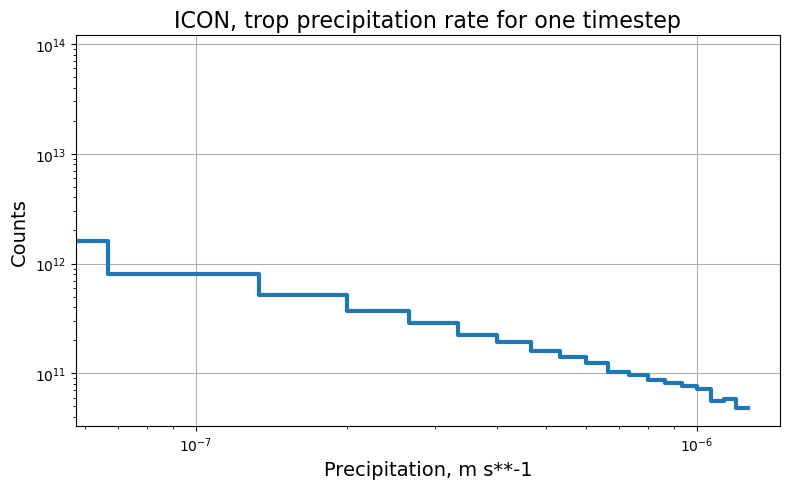

In [39]:
diag.hist_plot(hist_ifs_trop_weighted, frequency = False, pdf = False, step=True, smooth = False, xlogscale=True, \
                label='ICON/ICON_trop_log', plot_title = "ICON, trop precipitation rate for one timestep")

### Histogram of logspaced binning. Argument `xlogscale=True` setting x-axe to the log scale. By default `xlogscale=False` 

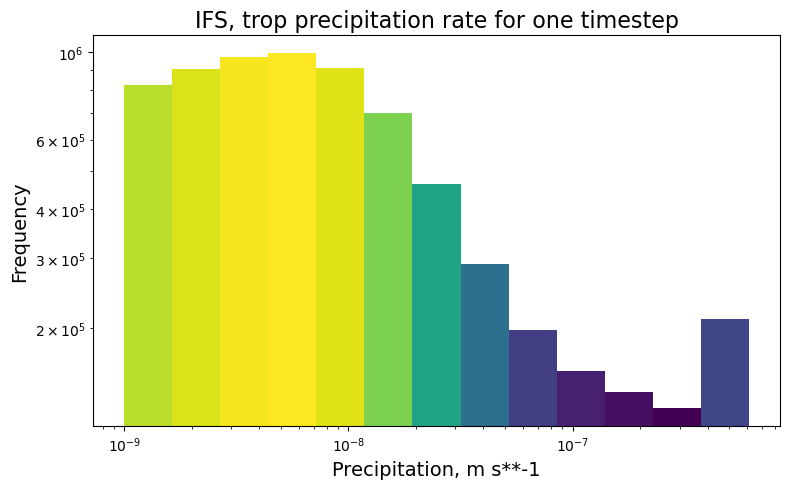

In [27]:
diag.hist_plot(hist_ifs_trop_logspaced, pdf = False, smooth = False, xlogscale=True, label='IFS/IFS_trop_log', plot_title = "IFS, trop precipitation rate for one timestep")

#### OR

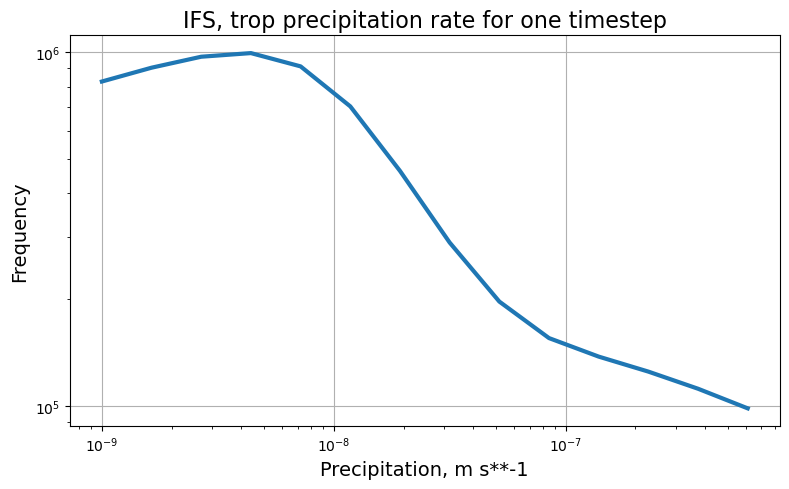

In [28]:
diag.hist_plot(hist_ifs_trop_logspaced, pdf = False, smooth = True, xlogscale=True, label='IFS/IFS_trop_log', plot_title = "IFS, trop precipitation rate for one timestep")

#### Plot of mean and median value of precipitation rate

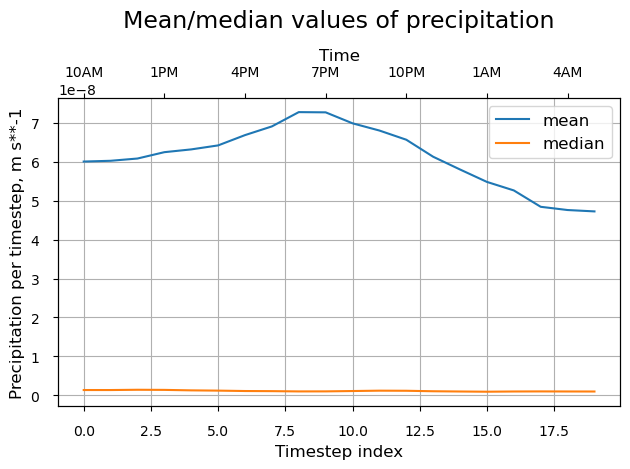

In [29]:
diag.mean_and_median_plot(ifs_chunk, savelabel = 'IFS/IFS')

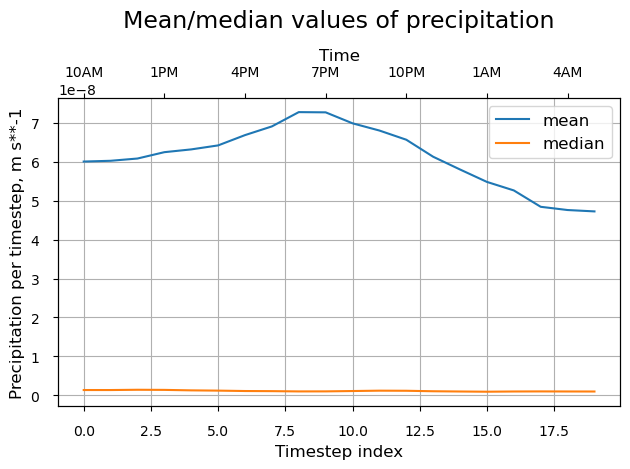

In [30]:
diag.mean_and_median_plot(ifs_chunk_trop, savelabel = 'IFS/IFS_trop')

#### The end